# Geospatial Vector Data Visualization

## This checks for the packages

In [5]:
# Load relevant R packages
inLibraries = list('repr','rgdal','rgeos')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){
      #View version info of package
      suppressMessages(print(packageDescription(rpack, fields = c("Package", "Version"))))      
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Package: repr
Version: 0.10

-- File: C:/Users/Jacky Zhao/Anaconda3/R/library/repr/Meta/package.rds 
-- Fields read: Package, Version
Package: rgdal
Version: 1.2-13

-- File: C:/Users/Jacky Zhao/Documents/R/win-library/3.4/rgdal/Meta/package.rds 
-- Fields read: Package, Version
Package: rgeos
Version: 0.3-25

-- File: C:/Users/Jacky Zhao/Documents/R/win-library/3.4/rgeos/Meta/package.rds 
-- Fields read: Package, Version


## Reading Vector Data (points, lines, polygons)

There are various ways of working with geospatial vector features in R. In this class, we will be primarily working with datasets in ESRI's Geographic Information System (GIS) shp file format.  Take a look at a shp file in the dataset directory (county_warning_areas/CWA_albers.shp). In this case, the shp file contains polygon geometries representing National Weather Public Forecast Zones (source: https://www.weather.gov/gis/CWABounds) otherwise known as County Warning Areas.

shp files are typically comprised of more than 4 files located in the same folder. All of the files will have the same prefix, but differ in their suffix. Some of the component file types include:
1. .dbf
2. .shp
3. .sbx
4. .shx
5. .prj
6. .cpg
7. .sbn
8. .shp.xml


## Coordinate Systems and Projections

When working with geospatial data, coordinate systems and projections are always an important consideration. Coordinate systems form the basis for locating geographic features, providing a x,y reference to a features location on the earth.  Projections are transformations of coordinate systems, rendering them in different ways to suit a particular analysis.  For instance, projections can be selected that minimize distortion in distance or shape of features for a particular region. Further, projections and coordinate systems are necessary for measuring geographic features and relations among them.

## Accessing shp file data

The 'readOGR' function (rgdal library) can be used to import GIS data in ESRI's shp file format. The readOGR function requires a path to the folder in which the shp file is stored and the name of the shp file (no file extension is needed). Upon successfuly import of the data, a message will appear that states the number of point, line, or polygon features in the dataset as well as the number of attribute fields that are present.

In [6]:
#Read in shp file
#Note: there is no need to include the .shp extension when using this tool
ppolys <- readOGR("datasets/county_warning_areas", "CWA_albers")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/county_warning_areas", layer: "CWA_albers"
with 116 features
It has 10 fields


## Working with shp files in R

In essence, once read into R, the shp file is now a dataframe. As such, common R functions for dataframes can usually be applied.  For example, see the use of 'nrow' below to output the number of rows in the dataframe.  

When readOGR() is applied, the polygon shp file is specifically read into a spatialpolygonsdataframe class (see sp library documentation).  The spatialpolygonsdataframe contains different components:
1. data - references attribute fields stored in the .dbf portion of the shp file
2. polygons - characteristics of the polygon
3. plotOrder - coordinates of vertices comprising points and lines defining the polygon
4. bbox - bounding coordinates for a polygon feature
5. proj4string - coordinate system in which the data is provided

These different components of the dataframe can be accessed by calling the name of the featureclass (i.e. ppolys) followed by @ and the name of the component (i.e. ppolys@data) as shown below. Some of the components reference characteristics of individual features in the featureclass (i.e. @data) while others reference characteristics of the dataframe as a whole (i.e. @proj4string). Take some time below to experiment with calling on different portions of the spatial dataframe.


In [7]:
#Retrieve the number of features in the dataframe
nrow(ppolys)

[1] 116

In [8]:
#Get the spatial coordinate system of the dataframe
#Note: the coordinate system is NAD83, wgs84 datum, units=meters
ppolys@proj4string

CRS arguments:
 +proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0
+datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 

In [9]:
#The first feature in the spatialpolygonsdataframe can be accessed as follows
ppolys@data[1,]

,CWA,WFO,LON,LAT,Region,FullStaId,CityState,City,State,ST
0,ABQ,ABQ,-106.0166,35.11254,SR,KABQ,Albuquerque NM,Albuquerque,New Mexico,NM


In [10]:
#The first feature in the spatialpolygonsdataframe can be accessed for a specific attribute as:
ppolys@data[1,]$Region

[1] SR
Levels: CR ER SR WR

In [11]:
#All rows for a particular attribute can be accessed as follows:
ppolys@data$Region

[1] SR CR ER ER SR CR CR ER CR SR WR CR ER SR ER ER ER ER ER ER SR ER CR CR CR
 [26] CR CR CR CR WR SR SR SR CR WR CR SR WR CR CR CR CR CR ER ER SR WR SR CR ER
 [51] ER CR CR CR SR SR CR SR CR SR SR WR CR CR WR CR SR ER SR SR SR SR WR ER CR
 [76] SR SR CR CR SR WR WR CR SR ER WR SR CR ER WR ER WR WR CR ER WR ER ER WR CR
[101] WR SR SR WR WR SR SR CR SR WR CR WR WR WR WR CR
Levels: CR ER SR WR

In [12]:
#All data elements for all features can be accessed as follows
ppolys@data

,CWA,WFO,LON,LAT,Region,FullStaId,CityState,City,State,ST
0,ABQ,ABQ,-106.01661,35.11254,SR,KABQ,Albuquerque NM,Albuquerque,New Mexico,NM
1,ABR,ABR,-99.15787,45.05594,CR,KABR,Aberdeen SD,Aberdeen,South Dakota,SD
2,AKQ,AKQ,-77.04384,37.23562,ER,KAKQ,Wakefield VA,Wakefield,Virginia,VA
3,ALY,ALY,-73.92112,42.81402,ER,KALY,Albany NY,Albany,New York,NY
4,AMA,AMA,-101.51643,35.86965,SR,KAMA,Amarillo TX,Amarillo,Texas,TX
5,APX,APX,-84.66401,45.01240,CR,KAPX,Gaylord MI,Gaylord,Michigan,MI
6,ARX,ARX,-91.35084,43.77760,CR,KARX,La Crosse WI,La Crosse,Wisconsin,WI
7,BGM,BGM,-75.89942,42.23319,ER,KBGM,Binghamton NY,Binghamton,New York,NY
8,BIS,BIS,-101.41758,47.36466,CR,KBIS,Bismarck ND,Bismarck,North Dakota,ND
9,BMX,BMX,-86.67589,33.02693,SR,KBMX,Birmingham AL,Birmingham,Alabama,AL


## Visualizing the Geographic Features in the FeatureClass

While R is certainly not a Geographic Information System(GIS), various R packages contain some functionalities to assist with visualization of geographic information.  Perhaps the simplist way to render a spatial featureclass is using the well-known 'plot' function.

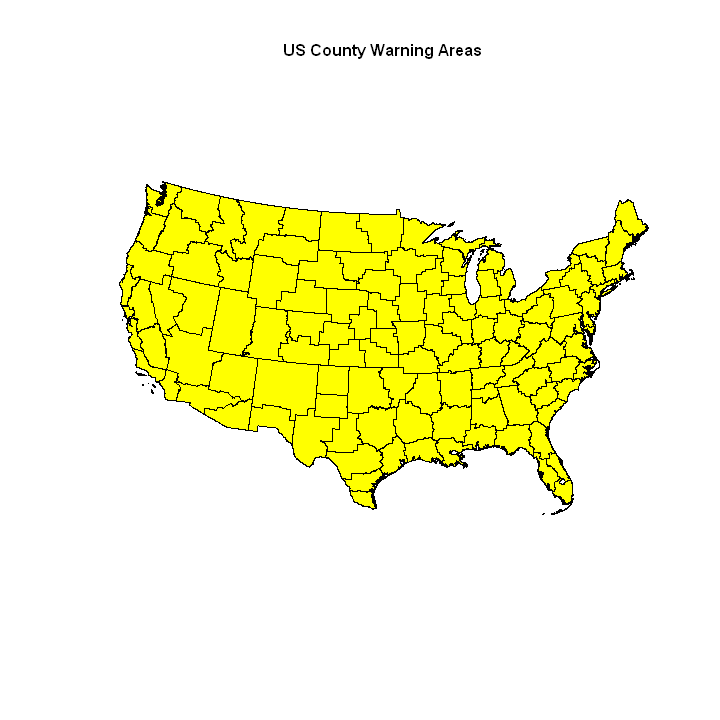

In [13]:
#Map shp file
plot(ppolys, col="yellow", main="US County Warning Areas", cex.main=.8)